In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nPerCLust = 50 # 클러스터당 데이터 개수

blur = 1 # 데이터 분산 정도

A = [1, 1]
B = [-3, 1]
C = [3, 3]

# 가우시안 분포 => 평균: 0, 분산: 1
# shape = (2, 50)
a = [A[0] + np.random.randn(nPerCLust) * blur, A[1] + np.random.randn(nPerCLust) * blur]
b = [B[0] + np.random.randn(nPerCLust) * blur, B[1] + np.random.randn(nPerCLust) * blur]
c = [C[0] + np.random.randn(nPerCLust) * blur, C[1] + np.random.randn(nPerCLust) * blur]

# 그래프를 쉽게 그리기 위해 transpose
data = np.transpose(np.concatenate((a, b, c), axis=1))




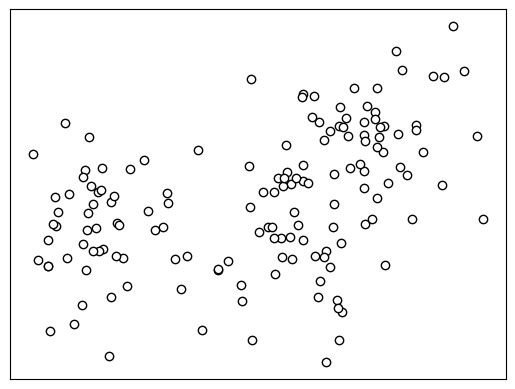

In [3]:
# 그래프 그리기
plt.plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
plt.xticks([])
plt.yticks([])

plt.show()

In [4]:
k = 3 # hyperparameter

ridx = np.random.choice(data.shape[0], k, replace=False) # 0~149 중에서 3개를 뽑음

centroids = data[ridx,:] # (3,2)

centroids

array([[-3.87809634,  3.03972526],
       [ 0.63598917,  0.15255173],
       [-1.02381835,  2.52456211]])

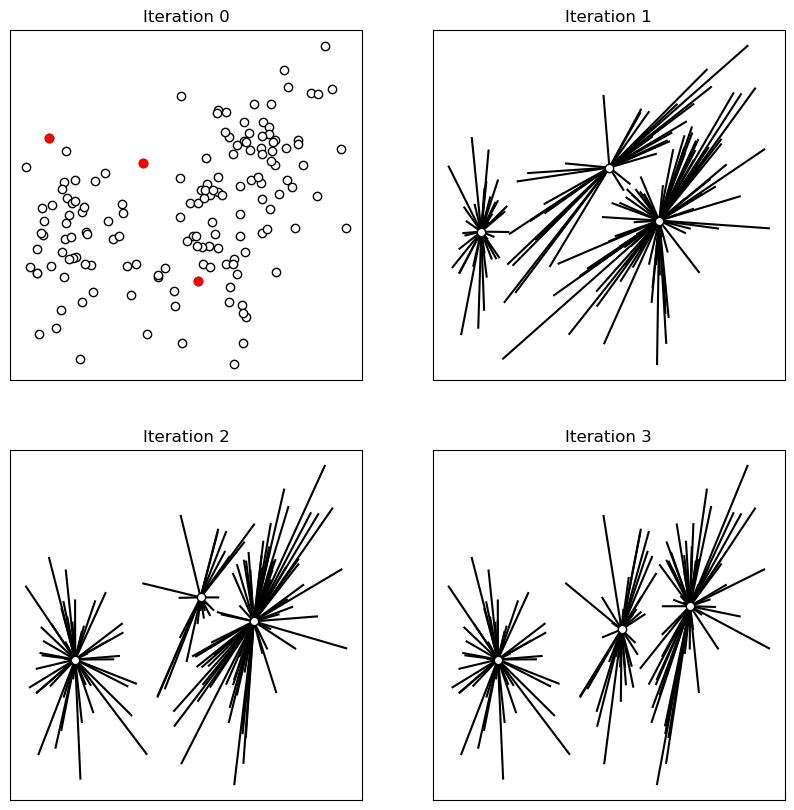

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ro')

for i in range(len(axs)):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].title.set_text(f'Iteration {i}')

for iteri in range(3):
    # 1. centroids 에서 각 데이터까지의 거리를 계산
    dists = np.zeros((data.shape[0], k))
    # 유클리드 거리 계산
    for ci in range(k):
        dists[:, ci] = np.sum((data - centroids[ci, :]) ** 2, axis=1)

    # 2. 제일 작은 거리 찾기
    groupIdx = np.argmin(dists, axis=1)

    # 3. centroids 업데이트

    for ki in range(k):
        centroids[ki, :] = [
            np.mean(data[groupIdx == ki, 0]),
            np.mean(data[groupIdx == ki, 1])
        ]
    
    for i in range(data.shape[0]):
        axs[iteri + 1].plot(
            [data[i, 0], centroids[groupIdx[i], 0]],
            [data[i, 1], centroids[groupIdx[i], 1]],
            'k-'
        )
    axs[iteri + 1].plot(centroids[:,0], centroids[:,1], 'ko', markerfacecolor='w')
    
